# Bacterial Spectrometry

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from PIL import Image
im = Image.open("bacteria.jpg")

## Intensity detection

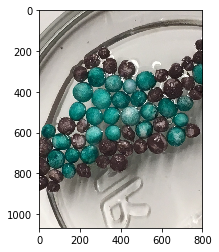

<class 'numpy.ndarray'>


AttributeError: 'str' object has no attribute 'rgb2gray'

In [ ]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks,hough_ellipse
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import img_as_float

cvimage = cv2.imread('bacteria.jpg')
# image_bgr = img_as_float(cvimage)
image_rgb = cv2.cvtColor(cvimage,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image_rgb)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
    
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print(type(image_rgb))
image_gray = color.rgb2gray(image_rgb)
# image_gray = cv2.convertScaleAbs(image_gray)
plt.imshow(image_gray)
plt.show()